In [1]:
from diffusion_curvature import diffusion_curvature
import numpy as np
from sklearn.linear_model import LinearRegression
from manifolds import ellipsoid_ground_truth, hyperboloid_ground_truth

In [2]:
path = '../src/results/torus/'
torus = np.loadtxt(path + 'torus_cloud_ratio_4.0.csv', delimiter=',')
our_torus = np.loadtxt(path +  'curvature_torus_ratio_4.0_combined.csv')
true_torus = np.loadtxt(path + 'torus_K_ratio_4.0.csv')
dc_torus = diffusion_curvature(torus)

Running MAGIC on 5000 cells and 3 genes.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.08 seconds.
  Calculating affinities...
  Calculated affinities in 0.11 seconds.
Calculated graph and diffusion operator in 0.22 seconds.


In [3]:
non_na_id = ~np.isnan(our_torus)
print(np.corrcoef(-our_torus[non_na_id], true_torus[non_na_id])[0, 1])
print(np.corrcoef(dc_torus, true_torus)[0, 1])

0.9150011881770577
0.6267557557898631


In [6]:
# path = '../src/results/ellipsoid_4_old/'
path = '../src/ellipsoid/'
ellipsoid = np.loadtxt(path + 'ellipsoid_cloud_ratio_4.0.csv', delimiter=',')
our_ellipsoid = np.loadtxt(path +  'curvature_ellipsoid_ratio_4.0_combined.csv')
# true_ellipsoid = np.array(ellipsoid_ground_truth(ellipsoid, 1, 2, 0.5))
true_ellipsoid = np.loadtxt(path + 'torus_K_ratio_4.0.csv')
dc_ellipsoid = diffusion_curvature(ellipsoid)

Running MAGIC on 5000 cells and 3 genes.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.14 seconds.
  Calculating affinities...
  Calculated affinities in 0.12 seconds.
Calculated graph and diffusion operator in 0.29 seconds.


In [12]:
non_na_id = ~np.isnan(our_ellipsoid)
print(np.corrcoef(our_ellipsoid[non_na_id], true_ellipsoid[non_na_id])[0, 1])
print(np.corrcoef(dc_ellipsoid, true_ellipsoid)[0, 1])

0.41559459407184307
-0.03315764820757884


(array([  94.,  529., 1472., 1281.,  751.,  449.,  226.,  118.,   43.,
          37.]),
 array([0.09709501, 0.10021867, 0.10334232, 0.10646597, 0.10958963,
        0.11271328, 0.11583694, 0.11896059, 0.12208425, 0.1252079 ,
        0.12833155]),
 <BarContainer object of 10 artists>)

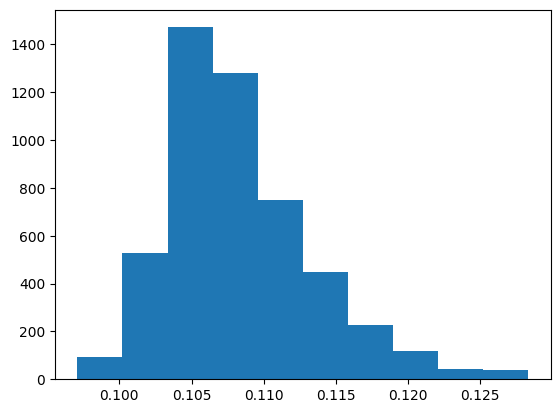

In [8]:
import matplotlib.pyplot as plt
plt.hist(dc_ellipsoid)

(array([1.338e+03, 2.557e+03, 8.120e+02, 1.490e+02, 2.400e+01, 6.000e+00,
        0.000e+00, 2.000e+00, 0.000e+00, 2.000e+00]),
 array([1.00589424, 1.00880485, 1.01171546, 1.01462606, 1.01753667,
        1.02044728, 1.02335789, 1.0262685 , 1.02917911, 1.03208972,
        1.03500033]),
 <BarContainer object of 10 artists>)

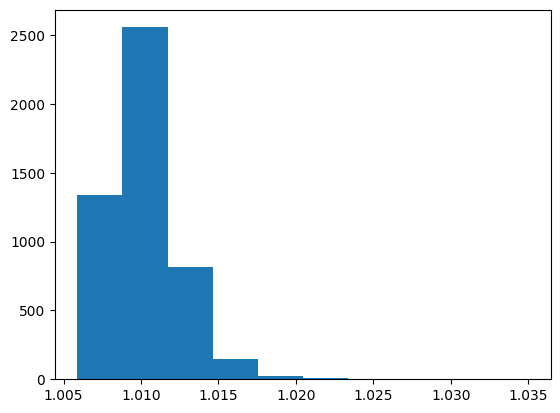

In [18]:
plt.hist(our_ellipsoid)

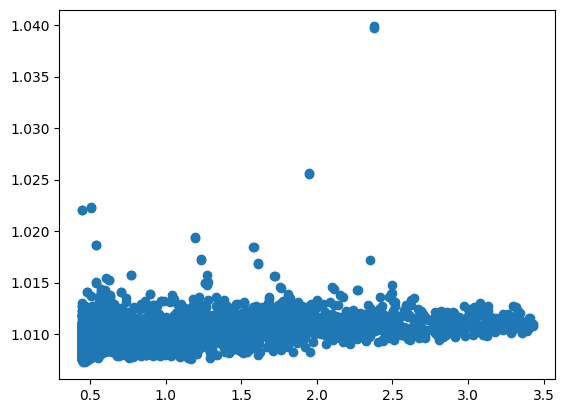

In [9]:
import matplotlib.pyplot as plt
plt.scatter(true_ellipsoid, our_ellipsoid)
plt.show()

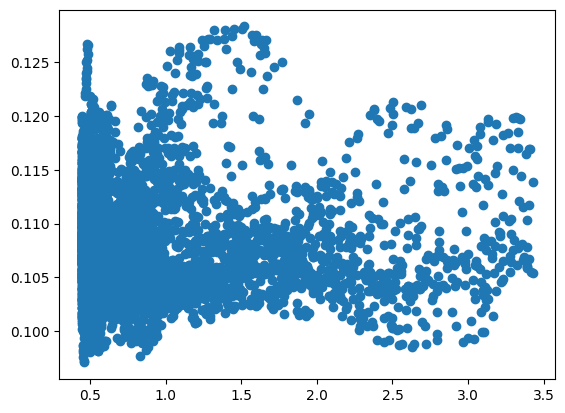

In [13]:
plt.scatter(true_ellipsoid, dc_ellipsoid)


In [14]:
non_na_id = ~np.isnan(our_ellipsoid)
print(np.corrcoef(our_ellipsoid[non_na_id], true_ellipsoid[non_na_id])[0, 1])
print(np.corrcoef(dc_ellipsoid, true_ellipsoid)[0, 1])

0.41559459407184307
-0.03315764820757884


In [15]:
path = '../src/results/hyperboloid_old/'
hyperboloid = np.loadtxt(path + 'hyperboloid_cloud_ratio_4.csv', delimiter=',')
cut_ids = np.loadtxt(path + 'hyperboloid_cloud_ratio_4_cutted_index.csv', delimiter=',').astype(int)
our_hyperboloid = np.loadtxt(path +  'curvature_hyperboloid_ratio_4_combined.csv')
hyperboloid = hyperboloid[cut_ids]
# our_hyperboloid = our_hyperboloid[cut_ids]
true_hyperboloid = np.array(hyperboloid_ground_truth(hyperboloid, 1, 1, 0.5))
dc_hyperboloid = diffusion_curvature(hyperboloid)

Running MAGIC on 4700 cells and 3 genes.
Calculating graph and diffusion operator...
  Calculating KNN search...
  Calculated KNN search in 0.15 seconds.
  Calculating affinities...
  Calculated affinities in 0.19 seconds.
Calculated graph and diffusion operator in 0.39 seconds.


In [27]:
non_na_id = ~np.isnan(our_hyperboloid)
print(np.corrcoef(-our_hyperboloid[non_na_id], true_hyperboloid[non_na_id])[0, 1])
print(np.corrcoef(dc_hyperboloid, true_hyperboloid)[0, 1])

0.5597069265146267
0.34187132766712997


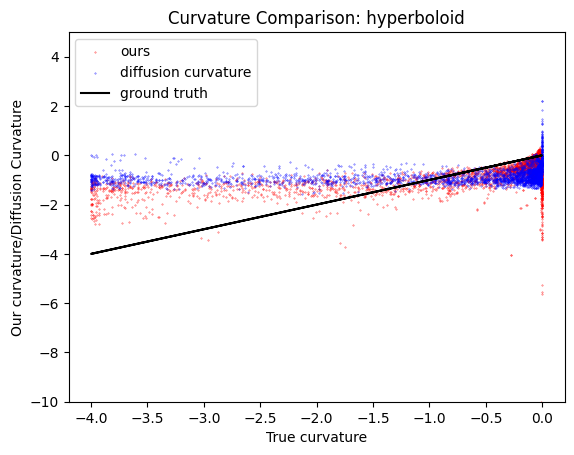

In [39]:
non_na_id = ~np.isnan(our_hyperboloid)
true_curv = true_hyperboloid[non_na_id]
our_curv = our_hyperboloid[non_na_id]
dcurv = dc_hyperboloid[non_na_id]
lr = LinearRegression()
lr = lr.fit(our_curv.reshape(-1, 1), true_curv.reshape(-1, 1))
lr2 = LinearRegression()
lr2 = lr2.fit(dcurv.reshape(-1, 1), true_curv.reshape(-1, 1))
rescaled_our_curv = lr.predict(our_curv.reshape(-1,1)).reshape(1, -1)
rescaled_dcurv = lr2.predict(dcurv.reshape(-1,1)).reshape(1, -1)
plt.figure()
plt.scatter(true_curv, rescaled_our_curv, s=.1, alpha=.8, c='red', label='ours')
plt.scatter(true_curv, rescaled_dcurv, s=.1, alpha=0.8, c='blue', label='diffusion curvature')
plt.plot(true_curv, true_curv, c='black', label='ground truth')
plt.xlabel('True curvature')
plt.ylabel('Our curvature/Diffusion Curvature')
plt.ylim(-10,5)
plt.title('Curvature Comparison: hyperboloid')
plt.legend()
plt.show()

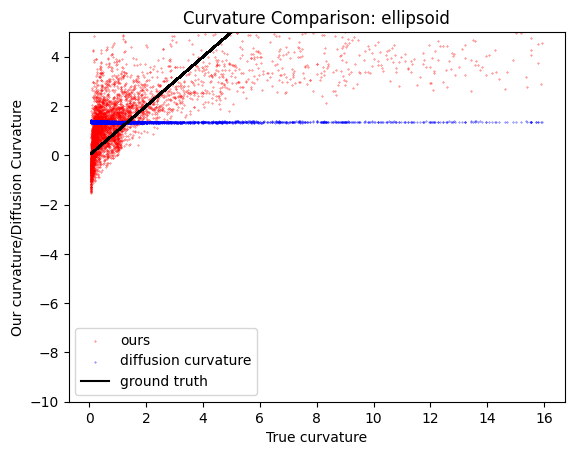

In [40]:
non_na_id = ~np.isnan(our_ellipsoid)
true_curv = true_ellipsoid[non_na_id]
our_curv = our_ellipsoid[non_na_id]
dcurv = dc_ellipsoid[non_na_id]
lr = LinearRegression()
lr = lr.fit(our_curv.reshape(-1, 1), true_curv.reshape(-1, 1))
lr2 = LinearRegression()
lr2 = lr2.fit(dcurv.reshape(-1, 1), true_curv.reshape(-1, 1))
rescaled_our_curv = lr.predict(our_curv.reshape(-1,1)).reshape(1, -1)
rescaled_dcurv = lr2.predict(dcurv.reshape(-1,1)).reshape(1, -1)
plt.figure()
plt.scatter(true_curv, rescaled_our_curv, s=.1, alpha=.8, c='red', label='ours')
plt.scatter(true_curv, rescaled_dcurv, s=.1, alpha=0.8, c='blue', label='diffusion curvature')
plt.plot(true_curv, true_curv, c='black', label='ground truth')
plt.xlabel('True curvature')
plt.ylabel('Our curvature/Diffusion Curvature')
plt.ylim(-10,5)
plt.title('Curvature Comparison: ellipsoid')
plt.legend()
plt.show()

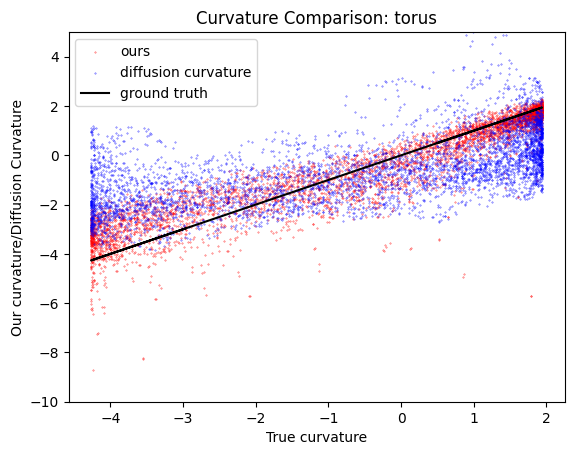

In [41]:
non_na_id = ~np.isnan(our_torus)
true_curv = true_torus[non_na_id]
our_curv = our_torus[non_na_id]
dcurv = dc_torus[non_na_id]
lr = LinearRegression()
lr = lr.fit(our_curv.reshape(-1, 1), true_curv.reshape(-1, 1))
lr2 = LinearRegression()
lr2 = lr2.fit(dcurv.reshape(-1, 1), true_curv.reshape(-1, 1))
rescaled_our_curv = lr.predict(our_curv.reshape(-1,1)).reshape(1, -1)
rescaled_dcurv = lr2.predict(dcurv.reshape(-1,1)).reshape(1, -1)
plt.figure()
plt.scatter(true_curv, rescaled_our_curv, s=.1, alpha=.8, c='red', label='ours')
plt.scatter(true_curv, rescaled_dcurv, s=.1, alpha=0.8, c='blue', label='diffusion curvature')
plt.plot(true_curv, true_curv, c='black', label='ground truth')
plt.xlabel('True curvature')
plt.ylabel('Our curvature/Diffusion Curvature')
plt.ylim(-10,5)
plt.title('Curvature Comparison: torus')
plt.legend()
plt.show()

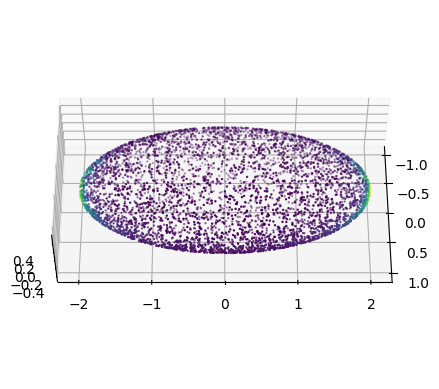

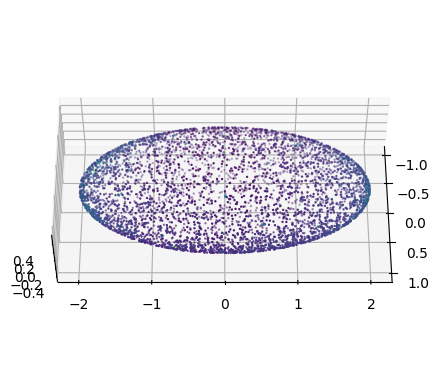

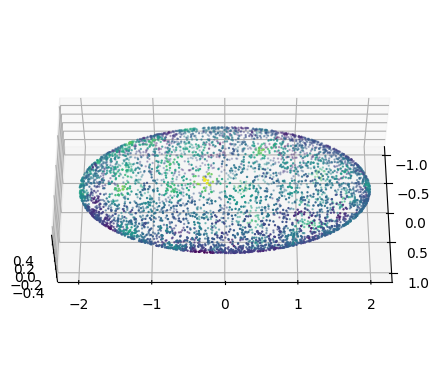

In [46]:
# ellipsoid = pd.read_csv('output/ellipsoid_cloud_ratio_4.csv', sep=',', header=None)
# ellipsoid = np.array(ellipsoid)
# df = pd.read_csv('output/curvature_ellipsoid_ratio_4.csv', sep=',', header=None)
v = true_ellipsoid
# Visualize the point cloud
cc = v
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(ellipsoid[:, 0], ellipsoid[:, 1], ellipsoid[:, 2], s=0.5, c = cc)
#ax.set_title("Curvature on torus point cloud")
ax.view_init(55, 0)
#plt.colorbar(scatter)
# plt.axis('off')
ax.set_aspect('equal')
plt.show()
#plt.savefig('curvature_torus.png', dpi = 300)

# ellipsoid = pd.read_csv('output/ellipsoid_cloud_ratio_4.csv', sep=',', header=None)
# ellipsoid = np.array(ellipsoid)
# df = pd.read_csv('output/curvature_ellipsoid_ratio_4.csv', sep=',', header=None)
v = our_ellipsoid
# Visualize the point cloud
cc = v
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(ellipsoid[:, 0], ellipsoid[:, 1], ellipsoid[:, 2], s=0.5, c = cc)
#ax.set_title("Curvature on torus point cloud")
ax.view_init(55, 0)
#plt.colorbar(scatter)
# plt.axis('off')
ax.set_aspect('equal')
plt.show()
#plt.savefig('curvature_torus.png', dpi = 300)


# ellipsoid = pd.read_csv('output/ellipsoid_cloud_ratio_4.csv', sep=',', header=None)
# ellipsoid = np.array(ellipsoid)
# df = pd.read_csv('output/curvature_ellipsoid_ratio_4.csv', sep=',', header=None)
v = dc_ellipsoid
# Visualize the point cloud
cc = v
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(ellipsoid[:, 0], ellipsoid[:, 1], ellipsoid[:, 2], s=0.5, c = cc)
#ax.set_title("Curvature on torus point cloud")
ax.view_init(55, 0)
#plt.colorbar(scatter)
# plt.axis('off')
ax.set_aspect('equal')
plt.show()
#plt.savefig('curvature_torus.png', dpi = 300)

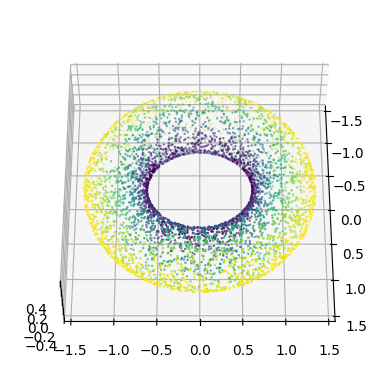

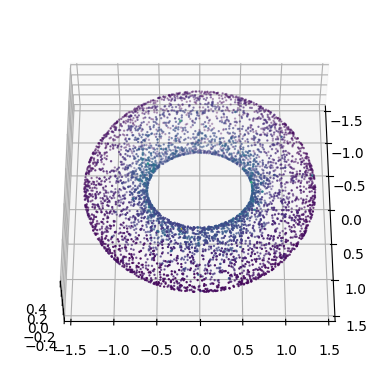

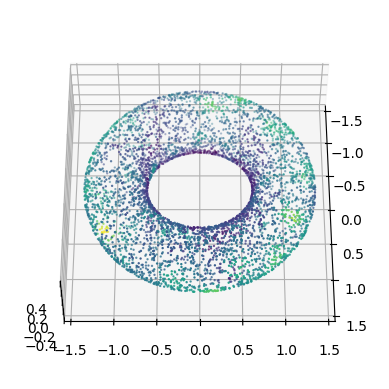

In [47]:
# torus = pd.read_csv('output/torus_cloud_ratio_4.csv', sep=',', header=None)
# torus = np.array(torus)
# df = pd.read_csv('output/curvature_torus_ratio_4.csv', sep=',', header=None)
v = true_torus
# Visualize the point cloud
cc = v
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(torus[:, 0], torus[:, 1], torus[:, 2], s=0.5, c = cc)
#ax.set_title("Curvature on torus point cloud")
ax.view_init(55, 0)
#plt.colorbar(scatter)
# plt.axis('off')
ax.set_aspect('equal')
plt.show()
#plt.savefig('curvature_torus.png', dpi = 300)

# torus = pd.read_csv('output/torus_cloud_ratio_4.csv', sep=',', header=None)
# torus = np.array(torus)
# df = pd.read_csv('output/curvature_torus_ratio_4.csv', sep=',', header=None)
v = our_torus
# Visualize the point cloud
cc = v
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(torus[:, 0], torus[:, 1], torus[:, 2], s=0.5, c = cc)
#ax.set_title("Curvature on torus point cloud")
ax.view_init(55, 0)
#plt.colorbar(scatter)
# plt.axis('off')
ax.set_aspect('equal')
plt.show()
#plt.savefig('curvature_torus.png', dpi = 300)


# torus = pd.read_csv('output/torus_cloud_ratio_4.csv', sep=',', header=None)
# torus = np.array(torus)
# df = pd.read_csv('output/curvature_torus_ratio_4.csv', sep=',', header=None)
v = dc_torus
# Visualize the point cloud
cc = v
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(torus[:, 0], torus[:, 1], torus[:, 2], s=0.5, c = cc)
#ax.set_title("Curvature on torus point cloud")
ax.view_init(55, 0)
#plt.colorbar(scatter)
# plt.axis('off')
ax.set_aspect('equal')
plt.show()
#plt.savefig('curvature_torus.png', dpi = 300)

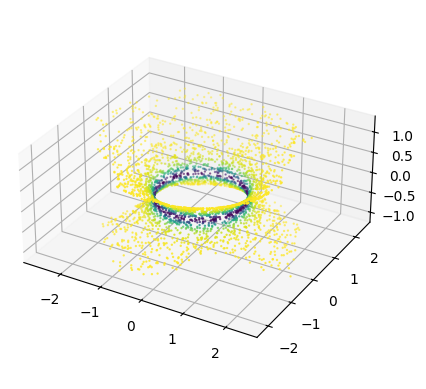

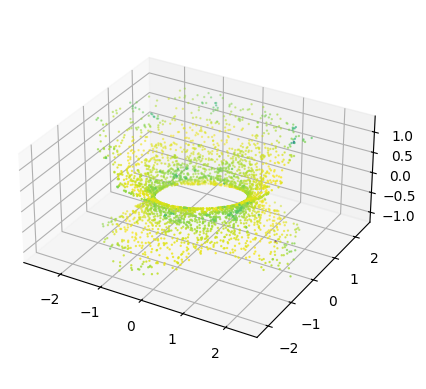

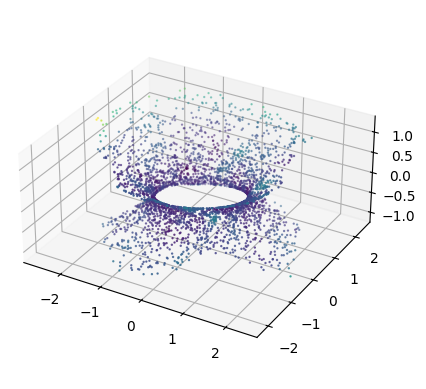

In [53]:
non_na_id = ~np.isnan(our_hyperboloid)
true_curv = true_hyperboloid[non_na_id]
our_curv = our_hyperboloid[non_na_id]
dcurv = dc_hyperboloid[non_na_id]
lr = LinearRegression()
lr = lr.fit(our_curv.reshape(-1, 1), true_curv.reshape(-1, 1))
lr2 = LinearRegression()
lr2 = lr2.fit(dcurv.reshape(-1, 1), true_curv.reshape(-1, 1))
rescaled_our_curv = lr.predict(our_curv.reshape(-1,1)).reshape(1, -1)
rescaled_dcurv = lr2.predict(dcurv.reshape(-1,1)).reshape(1, -1)

filtered_hyperboloid = hyperboloid[non_na_id, :]

v = true_curv
# Visualize the point cloud
cc = v
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(filtered_hyperboloid[:, 0], filtered_hyperboloid[:, 1], filtered_hyperboloid[:, 2], s=0.5, c = cc)
#ax.set_title("Curvature on hyperboloid point cloud")
# ax.view_init(55, 0)
#plt.colorbar(scatter)
# plt.axis('off')
ax.set_aspect('equal')
plt.show()
#plt.savefig('curvature_hyperboloid.png', dpi = 300)

# hyperboloid = pd.read_csv('output/hyperboloid_cloud_ratio_4.csv', sep=',', header=None)
# hyperboloid = np.array(hyperboloid)
# df = pd.read_csv('output/curvature_hyperboloid_ratio_4.csv', sep=',', header=None)
v = rescaled_our_curv
# Visualize the point cloud
cc = v
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(filtered_hyperboloid[:, 0], filtered_hyperboloid[:, 1], filtered_hyperboloid[:, 2], s=0.5, c = cc)
#ax.set_title("Curvature on hyperboloid point cloud")
# ax.view_init(55, 0)
#plt.colorbar(scatter)
# plt.axis('off')
ax.set_aspect('equal')
plt.show()
#plt.savefig('curvature_hyperboloid.png', dpi = 300)


# hyperboloid = pd.read_csv('output/hyperboloid_cloud_ratio_4.csv', sep=',', header=None)
# hyperboloid = np.array(hyperboloid)
# df = pd.read_csv('output/curvature_hyperboloid_ratio_4.csv', sep=',', header=None)
v = rescaled_dcurv
# Visualize the point cloud
cc = v
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(filtered_hyperboloid[:, 0], filtered_hyperboloid[:, 1], filtered_hyperboloid[:, 2], s=0.5, c = cc)
#ax.set_title("Curvature on hyperboloid point cloud")
# ax.view_init(55, 0)
#plt.colorbar(scatter)
# plt.axis('off')
ax.set_aspect('equal')
plt.show()
#plt.savefig('curvature_hyperboloid.png', dpi = 300)